In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import numpy as np
import pandas as pd

In [262]:
with open("budget_mojo_imdb.pkl", 'r') as picklefile: 
    data = pickle.load(picklefile)

In [502]:
data[["Title","Genres"]]

,Title,Genres
0,Avatar,"(Action, Adventure, Fantasy)"
1,Pirates of the Caribbean: At World's End,"(Action, Adventure, Fantasy)"
2,Spectre,"(Action, Adventure, Thriller)"
3,The Dark Knight Rises,"(Action, Thriller)"
4,The Lone Ranger,"(Action, Adventure, Western)"
5,John Carter,"(Action, Adventure, Fantasy)"
6,Tangled,"(Animation, Adventure, Comedy)"
7,Spider-Man 3,"(Action, Adventure)"
8,The Hobbit: An Unexpected Journey,"(Adventure, Fantasy)"
9,Harry Potter and the Half-Blood Prince,"(Adventure, Family, Fantasy)"


## Mean of Previous Scores
##### Turn categories into numerical data by averaging previous scores for category

In [146]:
def feature_df(df,merge_column,date_column,title_column):
""" split_apply_combine
in:    df - dataframe, sorted ascending by dates
       date_column - column containing sorted ascending dates
       merge - column [director / actor / studio]
       title_column - column to merge original table with last

out:   df - with avg stats
"""
    self_merge = pd.merge(df,df,on=merge_column)
    self_merge = self_merge[self_merge[date_column+"_x"] > self_merge[date_column+"_y"]]
    prior_averages = self_merge.groupby(by=[merge_column, title_column+"_y"]).mean().reset_index()
    
    mylist = list(prior_averages.keys())
    sub = '_x'
    new_features = [s for s in mylist if sub in s]
    new_features_rename = [column.replace("_x","_"+merge_column) for column in new_features]
    new_features_rename.append(title_column)
    new_features.append(title_column+"_y")
    
    d = dict(zip(new_features,new_features_rename))

    featuredf = prior_averages[new_features]
    featuredf.rename(columns=d,inplace=True)
    
    return featuredf

In [328]:
actor1_features = feature_df(data,"Actor1","Open","Title")
actor2_features = feature_df(data,"Actor2","Open","Title")
actor3_features = feature_df(data,"Actor3","Open","Title")
director_features = feature_df(data,"Director","Open","Title")
studio_features = feature_df(data,"Studio","Open","Title")

In [329]:
data_a1 = pd.merge(data,actor1_features,on="Title",how='left')
data_a2 = pd.merge(data_a1,actor2_features,on="Title",how='left')
data_a3 = pd.merge(data_a2,actor3_features,on="Title",how='left')
data_dir = pd.merge(data_a3,director_features,on="Title",how='left')
data_stud = pd.merge(data_dir,studio_features,on="Title",how='left') #.fillna(-1)

In [305]:
data_stud["xs"] = data_stud.Production_Budget_Studio #.fillna(-1)


In [321]:
# data_dir.fillna(0)
np.array(sorted(list(data_stud.keys()))) #.reshape(31,2)

array(['Actor1', 'Actor2', 'Actor3', 'Actors', 'Box_Office',
       'Box_Office_Actor1', 'Box_Office_Actor2', 'Box_Office_Actor3',
       'Box_Office_Director', 'Box_Office_Studio', 'Director',
       'Domestic_Gross', 'Domestic_Gross_Actor1', 'Domestic_Gross_Actor2',
       'Domestic_Gross_Actor3', 'Domestic_Gross_Director',
       'Domestic_Gross_Studio', 'Genres', 'IMDB_Score',
       'IMDB_Score_Actor1', 'IMDB_Score_Actor2', 'IMDB_Score_Actor3',
       'IMDB_Score_Director', 'IMDB_Score_Studio', 'Metascore',
       'Metascore_Actor1', 'Metascore_Actor2', 'Metascore_Actor3',
       'Metascore_Director', 'Metascore_Studio', 'Noms', 'Noms_Actor1',
       'Noms_Actor2', 'Noms_Actor3', 'Noms_Director', 'Noms_Studio',
       'Open', 'Opening', 'Opening_Actor1', 'Opening_Actor2',
       'Opening_Actor3', 'Opening_Director', 'Opening_Studio',
       'Production_Budget', 'Production_Budget_Actor1',
       'Production_Budget_Actor2', 'Production_Budget_Actor3',
       'Production_Budget_Dire

In [496]:
# for name,group in data_stud.groupby('Studio'):
#     print group
#     break
res = data_stud.corr(method='pearson').unstack().reset_index()
res.columns=["l1","l2","Corr"]
nres = res.sort_values(by='Corr',ascending=False)
nres[(nres.Corr < 1) & (nres.Corr > .2) & (nres.l1 == "Opening") ]
# nres[(nres.Corr > -1) & (nres.Corr < 0)]

data_stud.Production_Budget.corr(data_stud.Opening_Studio)
## Opening ~
# Production_Budget 

rez = data_stud[["Production_Budget","Production_Budget_Director","Production_Budget_Studio","Opening_Director","Opening_Studio", "Production_Budget_Actor1"]]
rez.corr()



,Production_Budget,Production_Budget_Director,Production_Budget_Studio,Opening_Director,Opening_Studio,Production_Budget_Actor1
Production_Budget,1.000000,0.473794,0.474696,0.314635,0.450324,0.319830
Production_Budget_Director,0.473794,1.000000,0.295990,0.746863,0.275093,0.338222
Production_Budget_Studio,0.474696,0.295990,1.000000,0.227058,0.892143,0.212327
Opening_Director,0.314635,0.746863,0.227058,1.000000,0.237309,0.278412
Opening_Studio,0.450324,0.275093,0.892143,0.237309,1.000000,0.210237
Production_Budget_Actor1,0.319830,0.338222,0.212327,0.278412,0.210237,1.000000


## Modeling

In [251]:
import statsmodels.api as sm
from patsy import dmatrices

In [310]:
# Metascore*IMDB_Score + Metascore_Director*Metascore_Actor1*Metascore_Actor2*Metascore_Actor3 + IMDB_Score_Actor1*IMDB_Score_Actor2*IMDB_Score_Actor3 + Wins_Actor1*Wins_Actor2*Wins_Actor3*Wins_Director + Noms_Director*Noms_Actor1*Noms_Actor2*Noms_Actor3
Y, x = dmatrices(" Noms ~ Metascore*IMDB_Score + Metascore_Director*Metascore_Actor1*Metascore_Actor2*Metascore_Actor3 + IMDB_Score_Actor1*IMDB_Score_Actor2*IMDB_Score_Actor3 + Wins_Actor1*Wins_Actor2*Wins_Actor3*Wins_Director + Noms_Director*Noms_Actor1*Noms_Actor2*Noms_Actor3", data=data_dir, return_type = "dataframe")

In [306]:
Y, x = dmatrices(" Noms ~ xs", data=data_stud, return_type = "dataframe")

In [242]:
XX = data_dir[["Metascore", "IMDB_Score", "Metascore_Director", "Metascore_Actor1", "Metascore_Actor2", "Metascore_Actor3","IMDB_Score_Actor1","IMDB_Score_Actor2","IMDB_Score_Actor3", "Wins_Actor1","Wins_Actor2","Wins_Actor3","Wins_Director","Noms_Director","Noms_Actor1","Noms_Actor2","Noms_Actor3"]]

In [235]:
YY = data_dir["Noms"]

In [403]:
# Y, x = dmatrices(" Noms ~ xs", data=data_stud, return_type = "dataframe")
model = sm.OLS(Y, x)
results = model.fit()
# results.summary()

In [281]:
# hie_data = sm.datasets.randhie.load_pandas()
# corr_matrix = np.corrcoef(hie_data.data.T)
# sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names)


In [317]:
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
# rgr.fit(data_stud[['Domestic_Gross']].values, data_stud['Noms'])
rgr.fit(XX, data_stud['Noms'])

pred = rgr.predict(new_df[['Normalized_Production_Budget']].values)
# print sum((pred - new_df['Normalized_Domestic_Gross'])**2)
# data_stud[["Metascore", "IMDB_Score", "Metascore_Director", "Metascore_Actor1", "Metascore_Actor2", "Metascore_Actor3","IMDB_Score_Actor1","IMDB_Score_Actor2","IMDB_Score_Actor3", "Wins_Actor1","Wins_Actor2","Wins_Actor3","Wins_Director","Noms_Director","Noms_Actor1","Noms_Actor2","Noms_Actor3"]].fillna(0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
XX = data_stud[["Metascore", "IMDB_Score", "Metascore_Director", "Metascore_Actor1", "Metascore_Actor2", "Metascore_Actor3","IMDB_Score_Actor1","IMDB_Score_Actor2","IMDB_Score_Actor3", "Wins_Actor1","Wins_Actor2","Wins_Actor3","Wins_Director","Noms_Director","Noms_Actor1","Noms_Actor2","Noms_Actor3"]].fillna(0).values

In [316]:
XX

array([[ 83.        ,   7.9       ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 50.        ,   7.1       ,  56.        , ...,   0.42857143,
          0.        ,   0.        ],
       [ 60.        ,   7.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 68.        ,   7.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 64.        ,   6.2       ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 45.        ,   6.3       ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [318]:
print rgr.coef_,rgr.intercept_
# plt.plot(data_stud[['Domestic_Gross']].values,(data_stud[['Domestic_Gross']].values*rgr.coef_ + rgr.intercept_))
# plt.scatter(data_stud[['Domestic_Gross']].values, data_stud['Noms'])

[ 0.02615512  0.20757857 -0.00044581 -0.00546338 -0.00892415 -0.0011908
  0.06017814  0.06993625  0.01586574  0.01296882  0.06243296  0.23071763
 -0.25764459  0.35744619  0.13768525 -0.01562358 -0.11977882] -2.33344089298


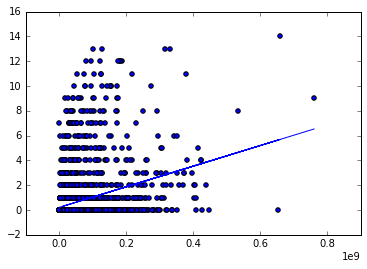

In [309]:
plt.plot(data_stud[['Domestic_Gross']].values,(data_stud[['Domestic_Gross']].values*rgr.coef_ + rgr.intercept_))
plt.scatter(data_stud[['Domestic_Gross']].values, data_stud['Noms'])

In [287]:
rgr.score(data_stud[['Domestic_Gross']].values,data_stud['Noms'])

0.099730180466107488

In [394]:
xx = data_stud[["Metascore","IMDB_Score","Actor1","Noms_Actor1","Actor3","Noms_Actor3","Actor2","Noms_Actor2","Director","Noms_Director","Noms","Title"]].sort_values(by="Noms",ascending=False).dropna()

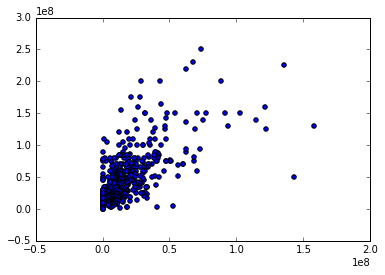

In [508]:
monnies = data_stud[["Opening", "IMDB_Score_Director","Noms_Director","Production_Budget","Opening_Studio", 
                     "Opening_Actor1","Opening_Actor2", "Opening_Director", "Opening_Actor3"]].sort_values(by="Opening",ascending=False).dropna()


s = """'Actor1', 'Actor2', 'Actor3', 'Actors', 'Box_Office',
       'Box_Office_Actor1', 'Box_Office_Actor2', 'Box_Office_Actor3',
       'Box_Office_Director', 'Box_Office_Studio', 'Director',
       'Domestic_Gross', 'Domestic_Gross_Actor1', 'Domestic_Gross_Actor2',
       'Domestic_Gross_Actor3', 'Domestic_Gross_Director',
       'Domestic_Gross_Studio', 'Genres', 'IMDB_Score',
       'IMDB_Score_Actor1', 'IMDB_Score_Actor2', 'IMDB_Score_Actor3',
       'IMDB_Score_Director', 'IMDB_Score_Studio', 'Metascore',
       'Metascore_Actor1', 'Metascore_Actor2', 'Metascore_Actor3',
       'Metascore_Director', 'Metascore_Studio', 'Noms', 'Noms_Actor1',
       'Noms_Actor2', 'Noms_Actor3', 'Noms_Director', 'Noms_Studio',
       'Open', 'Opening', 'Opening_Actor1', 'Opening_Actor2',
       'Opening_Actor3', 'Opening_Director', 'Opening_Studio',
       'Production_Budget', 'Production_Budget_Actor1',
       'Production_Budget_Actor2', 'Production_Budget_Actor3',
       'Production_Budget_Director', 'Production_Budget_Studio', 'Rank',
       'Rating', 'Studio', 'Title', 'Total_Gross', 'Total_Gross_Actor1',
       'Total_Gross_Actor2', 'Total_Gross_Actor3', 'Total_Gross_Director',
       'Total_Gross_Studio', 'Users', 'Users_Actor1', 'Users_Actor2',
       'Users_Actor3', 'Users_Director', 'Users_Studio', 'Wins',
       'Wins_Actor1', 'Wins_Actor2', 'Wins_Actor3', 'Wins_Director',
       'Wins_Studio', 'cpi_date'"""

plt.scatter(monnies.Opening,monnies.Production_Budget)
plt.plot
plt.show()
# monnies.Opening.corr(monnies.Production_Budget)

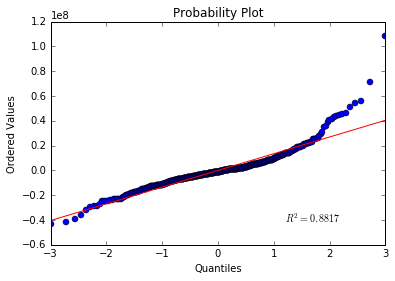

,Intercept,Production_Budget,Opening_Studio,Opening_Actor2,Opening_Director,Opening_Actor1,Opening_Actor3
157,1,130000000,26202328.083333,7.489016e+07,1.122818e+08,1.122818e+08,112281807.5
764,1,50000000,12337021.538462,6.483219e+07,6.208700e+04,4.061834e+07,64832191.0
15,1,225000000,33927331.430556,1.147328e+08,6.067433e+07,4.398176e+07,65092400.5
173,1,125000000,20649605.285714,5.138642e+07,1.026660e+08,1.026660e+08,102665981.0
79,1,160000000,38887387.840000,4.272318e+07,3.407744e+07,4.237267e+07,70838207.0


In [560]:
Y, x = dmatrices("Opening ~Production_Budget + Opening_Studio + Opening_Actor2 + Opening_Director + Opening_Actor1+Opening_Actor3", data=monnies, return_type = "dataframe")
model = sm.OLS(Y, x)
results = model.fit()
results.summary()
import scipy.stats as stats
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()
x.head()
# data_dir[["Metascore","IMDB_Score","Opening_Actor3"]].corr()

In [561]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Opening   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           5.72e-85
Time:                        14:17:30   Log-Likelihood:                -9143.4
No. Observations:                 511   AIC:                         1.830e+04
Df Residuals:                     504   BIC:                         1.833e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -8.166e+06   1.54e+06     -5.312      0.000     -1.12e+07 -5.15e+06
Production_Budget     0.2580      0.019     13.925      0.000         0.222     0.294
Opening_Studio        0.2050      0.080      2.564      0.011         0.048     0.362
Opening_Actor2        0.1175      0.037      3.161      0.002         0.044     0.191
Opening_Director      0.0043      0.034      0.128      0.898        -0.062     0.071
Opening_Actor1        0.2917      0.048      6.053      0.000         0.197     0.386
Opening_Actor3        0.1227      0.031      3.964      0.000         0.062     0.184
==============================================================================
Omnibus:                      219.041   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1890.132
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                      11.830   Cond. No.                     1.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [529]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(monnies[["Production_Budget","Opening_Actor1","Opening_Actor3"]], monnies.Opening, test_size=0.33)


rgr = LinearRegression(fit_intercept=False)
rgr.fit(X_train, y_train)
pred = rgr.predict(X_train)

test_pred = rgr.predict(X_test)
print sum((y_test-test_pred)**2)/len(pred)
# print sum((pred - monnies.Opening)**2)

9.1475416586e+13


In [498]:
pred

array([ 22882432.01483671,  44719251.62634645,   6644450.63962774,
         6944056.52436828,   9289310.65945526,  24832191.60773713,
        44619981.03717276,   5022044.85031009,  24536176.79682872,
         9726410.1424292 ,  18627676.7295322 ,   5092736.4679521 ,
         3960282.29944571,  12118081.89472041,   8166529.9973927 ,
        22842985.67419081,  10037080.78508471,   3748046.00734687,
        23563073.12365156,  43325292.82847762,  17619265.15289346,
        35162833.2413841 ,  18700793.70616176,   9195748.28769581,
         7659237.39130513,  57882057.26850906,  17510105.02970761,
         7322767.98337142,   7824395.9526378 ,  24600376.99797605,
        14640445.38559115,   6383470.22631513,  21777433.47527647,
         9556678.21657053,   8019133.14894322,   8664600.4764072 ,
        14025359.40201815,  10321995.5352607 ,  14025359.40201815,
        20386477.03897691,  10275772.26167949,   7009833.35311634,
         6128654.28183934,  25847400.33301847,  30748683.10070

In [462]:
print rgr.coef_[0],rgr.intercept_

0.2771204104 0.0


In [395]:
xx.head()

,Metascore,IMDB_Score,Actor1,Noms_Actor1,Actor3,Noms_Actor3,Actor2,Noms_Actor2,Director,Noms_Director,Noms,Title
29,74,7.7,Leonardo DiCaprio,3.388889,Billy Zane,0,Kate Winslet,1.5,James Cameron,4.500000,14,Titanic
224,92,8.8,Elijah Wood,3.600000,Orlando Bloom,2,Ian McKellen,2.5,Peter Jackson,3.363636,13,The Lord of the Rings: The Fellowship of the Ring
85,70,7.8,Brad Pitt,2.833333,Tilda Swinton,0,Cate Blanchett,0.5,David Fincher,3.000000,13,The Curious Case of Benjamin Button
1455,87,7.2,Gwyneth Paltrow,0.000000,Geoffrey Rush,2,Joseph Fiennes,0.0,John Madden,0.000000,13,Shakespeare in Love
699,82,8.8,Tom Hanks,2.888889,Gary Sinise,0,Robin Wright,1.5,Robert Zemeckis,0.857143,13,Forrest Gump


In [358]:
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
# rgr.fit(data_stud[['Domestic_Gross']].values, data_stud['Noms'])
rgr.fit(xx[['IMDB_Score','Noms_Actor1','Noms_Actor2','Noms_Actor3','Noms_Director']].values, xx['Noms'])

pred = rgr.predict(xx[['IMDB_Score','Noms_Actor1','Noms_Actor2','Noms_Actor3','Noms_Director']].values)
r

In [393]:
# print rgr.coef_,rgr.intercept_
# from sklearn.linear_model import LinearRegression
# rgr = LinearRegression()
# rgr.fit(xx['Noms_Actor1'].values, xx['Noms'])
# plt.plot(xx[['Noms_Actor1']].values, rgr.predict(xx['Noms_Actor1']))

# plt.scatter(xx[['Noms_Actor1']].values, xx['Noms'])
### range by using percentage of total
xx.describe()

,Metascore,IMDB_Score,Noms_Actor1,Noms_Actor3,Noms_Actor2,Noms_Director,Noms
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,58.873346,6.888469,0.736977,0.685476,0.639016,0.933443,1.083176
std,17.368364,0.936648,1.313443,1.483242,1.305123,1.669250,2.408295
min,12.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,6.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,6.900000,0.066667,0.000000,0.000000,0.000000,0.000000
75%,72.000000,7.600000,1.000000,0.900000,0.666667,1.000000,1.000000
max,94.000000,8.900000,12.000000,12.000000,10.000000,10.000000,14.000000


In [401]:
Y, x = dmatrices("Noms ~ IMDB_Score + Noms_Actor1*Noms_Actor2*Noms_Actor3*Noms_Director", data=xx, return_type = "dataframe")
model = sm.OLS(Y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Noms   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           7.83e-27
Time:                        13:51:01   Log-Likelihood:                -1130.9
No. Observations:                 529   AIC:                             2296.
Df Residuals:                     512   BIC:                             2368.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -5.6703      0.729     -7.779      0.000        -7.102    -4.238
IMDB_Score                                            0.9425      0.110      8.574      0.000         0.727     1.158
Noms_Actor1                                           0.0698      0.149      0.467      0.641        -0.224     0.363
Noms_Actor2                                           0.0985      0.137      0.720      0.472        -0.170     0.367
Noms_Actor1:Noms_Actor2                              -0.0325      0.096     -0.338      0.736        -0.222     0.157
Noms_Actor3                                          -0.0020      0.101     -0.020      0.984        -0.200     0.196
Noms_Actor1:Noms_Actor3                               0.1767      0.109      1.619      0.106        -0.038     0.391
Noms_Actor2:Noms_Actor3                              -0.2343      0.183     -1.277      0.202        -0.595     0.126
Noms_Actor1:Noms_Actor2:Noms_Actor3                   0.0272      0.048      0.562      0.575        -0.068     0.122
Noms_Director                                         0.1044      0.106      0.989      0.323        -0.103     0.312
Noms_Actor1:Noms_Director                             0.0909      0.057      1.585      0.114        -0.022     0.204
Noms_Actor2:Noms_Director                             0.0784      0.044      1.772      0.077        -0.009     0.165
Noms_Actor1:Noms_Actor2:Noms_Director                 0.0309      0.031      0.998      0.319        -0.030     0.092
Noms_Actor3:Noms_Director                            -0.0337      0.088     -0.383      0.702        -0.207     0.140
Noms_Actor1:Noms_Actor3:Noms_Director                -0.0946      0.036     -2.609      0.009        -0.166    -0.023
Noms_Actor2:Noms_Actor3:Noms_Director                 0.0274      0.055      0.497      0.620        -0.081     0.136
Noms_Actor1:Noms_Actor2:Noms_Actor3:Noms_Director    -0.0021      0.017     -0.119      0.905        -0.036     0.032
==============================================================================
Omnibus:                      268.327   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.033
Skew:                           2.229   Prob(JB):                         0.00
Kurtosis:                      10.035   Cond. No.                         989.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
# x

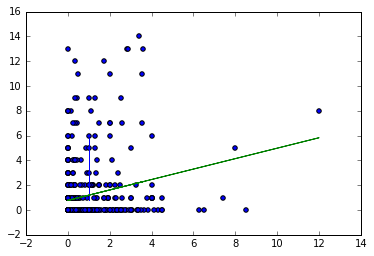

In [400]:
Y, x = dmatrices("Noms ~ Noms_Actor1", data=xx, return_type = "dataframe")
model = sm.OLS(Y, x)
results = model.fit()
results.summary()
plt.plot(x,results.predict(x))
plt.scatter(xx[['Noms_Actor1']].values, xx['Noms'])

In [381]:
xx_vals = xx[['IMDB_Score','Noms_Actor1','Noms_Actor2','Noms_Actor3','Noms_Director']]
y_val = xx["Noms"]
np_xx = xx_vals.as_matrix()
np_xx_t = np_xx.transpose()

In [383]:
from numpy.linalg import inv
np.dot(np.dot(inv(np.dot(np_xx_t,np_xx)),np_xx_t),y_val)

array([ 0.11131789,  0.24267744,  0.08527745, -0.17600164,  0.31047936])

In [ ]:
np.dot(np.dot(inv(np.dot(np_xx_t,np_xx)),np_xx_t),y_val)